In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score,recall_score,f1_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier


In [93]:
data = pd.read_csv("C:/Users/mvcc1/Downloads/Financial_Risk_Participants_Data/Train.csv")
test_data = pd.read_csv("C:/Users/mvcc1/Downloads/Financial_Risk_Participants_Data/Test.csv")

In [18]:
data.head()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
0,2,8.032,14,8,3,6,0,1
1,31,77.730,8,3,3,8,1,0
2,40,59.203,3,12,11,3,0,1
3,12,73.080,4,5,7,6,0,0
4,4,15.666,13,15,6,7,2,1


In [19]:
data.describe()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000
mean,19.576427,32.259346,8.189687,7.327808,7.046041,5.530387,0.613260,0.626151
std,14.722687,24.887291,3.312022,3.450667,3.156978,1.839124,0.764509,0.484270
min,0.000000,5.185000,3.000000,3.000000,3.000000,3.000000,0.000000,0.000000
25%,6.000000,13.565000,6.000000,5.000000,5.000000,4.000000,0.000000,0.000000
50%,14.000000,19.803000,8.000000,7.000000,7.000000,6.000000,1.000000,1.000000
75%,37.000000,62.594000,11.000000,10.000000,8.000000,7.000000,1.000000,1.000000
max,44.000000,80.809000,15.000000,15.000000,15.000000,13.000000,10.000000,1.000000


In [94]:
test_data.describe()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results
count,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000
mean,19.343348,32.591034,7.854077,7.424893,6.957082,5.648069,0.579399
std,14.915933,25.185948,3.176584,3.525117,3.337077,1.708424,0.703382
min,0.000000,5.469000,3.000000,3.000000,3.000000,3.000000,0.000000
25%,6.000000,12.156000,6.000000,5.000000,4.000000,4.000000,0.000000
50%,13.000000,19.968000,7.000000,7.000000,6.000000,6.000000,1.000000
75%,37.000000,62.766000,10.000000,10.000000,8.000000,7.000000,1.000000
max,41.000000,77.668000,15.000000,15.000000,15.000000,10.000000,5.000000


In [95]:
test_data.isnull()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
228,False,False,False,False,False,False,False
229,False,False,False,False,False,False,False
230,False,False,False,False,False,False,False
231,False,False,False,False,False,False,False


In [20]:
data.isnull()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
538,False,False,False,False,False,False,False,False
539,False,False,False,False,False,False,False,False
540,False,False,False,False,False,False,False,False
541,False,False,False,False,False,False,False,False


In [21]:
cormatrix = data.corr()

In [22]:
print(cormatrix)

                          City  Location_Score  Internal_Audit_Score  \
City                  1.000000        0.012551             -0.024306   
Location_Score        0.012551        1.000000             -0.358629   
Internal_Audit_Score -0.024306       -0.358629              1.000000   
External_Audit_Score -0.049994       -0.205775              0.453839   
Fin_Score            -0.051779       -0.264536              0.365133   
Loss_score            0.033183       -0.042139              0.007685   
Past_Results          0.004762       -0.074364              0.112093   
IsUnderRisk          -0.087463       -0.423956              0.586097   

                      External_Audit_Score  Fin_Score  Loss_score  \
City                             -0.049994  -0.051779    0.033183   
Location_Score                   -0.205775  -0.264536   -0.042139   
Internal_Audit_Score              0.453839   0.365133    0.007685   
External_Audit_Score              1.000000   0.433374   -0.038786   
Fin_Sc

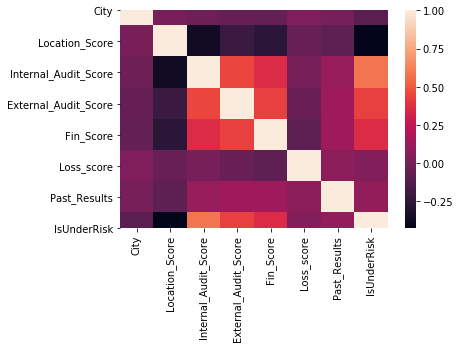

In [23]:
sn.heatmap(cormatrix)
plt.show()

In [37]:
newdata = data[['Internal_Audit_Score','External_Audit_Score','Fin_Score','Past_Results','Loss_score','IsUnderRisk']]

In [96]:
test_data = test_data[['Internal_Audit_Score','External_Audit_Score','Fin_Score','Past_Results','Loss_score']]

In [97]:
test_data.shape

(233, 5)

Detecting the outliers

In [39]:
#Using the Z-score
z = np.abs(stats.zscore(newdata))
print(z)

[[1.75592772 0.19498008 1.28279992 0.80290162 0.2555816  0.77269582]
 [0.05732506 1.25535119 1.28279992 0.50633436 1.34405853 1.29417033]
 [1.56836904 1.3552451  1.25360556 0.80290162 1.37713379 0.77269582]
 ...
 [0.35953385 0.67521868 1.28279992 0.50633436 1.34405853 1.29417033]
 [0.35953385 0.19498008 0.96574923 0.50633436 0.28865686 0.77269582]
 [1.75592772 1.3552451  0.93655488 1.81557034 1.37713379 0.77269582]]


In [99]:
z1 = np.abs(stats.zscore(test_data))
print(z1)

[[1.62344258 1.30065397 0.61350599 0.82550667 0.79303588]
 [0.58492677 0.73207541 0.01288878 0.59925669 0.9667485 ]
 [1.53137077 1.25794957 0.01288878 0.82550667 1.37963067]
 ...
 [0.26944543 0.68937101 0.88803703 0.59925669 0.38015371]
 [1.62344258 1.30065397 0.91381459 0.59925669 0.79303588]
 [0.58492677 0.68937101 1.18834564 0.59925669 0.20644109]]


In [41]:
threshold = 3
print(np.where(z>3))

(array([119, 124, 173, 260, 276, 292, 298, 401, 478], dtype=int64), array([3, 3, 3, 3, 3, 3, 4, 3, 3], dtype=int64))


In [100]:
print(np.where(z1>3))

(array([ 72, 198, 207], dtype=int64), array([3, 3, 3], dtype=int64))


In [42]:
z[173][3]

3.124806317901827

In [43]:
# removing the outliers
newdata = newdata[(z<3).all(axis =1)]

In [102]:
#for test_data
test_data = test_data[(z1<3).all(axis=1)]

In [44]:
newdata.shape

(534, 6)

In [103]:
test_data.shape

(230, 5)

In [75]:
x = newdata.iloc[:,:-1].values
y = newdata.iloc[:,-1].values

In [76]:
x

array([[14,  8,  3,  0,  6],
       [ 8,  3,  3,  1,  8],
       [ 3, 12, 11,  0,  3],
       ...,
       [ 7,  5,  3,  1,  8],
       [ 7,  8,  4,  1,  5],
       [14, 12, 10,  2,  3]], dtype=int64)

In [77]:
y

array([1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,

In [80]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [81]:
logres = LogisticRegression()

In [82]:
#fitting the data
logres.fit(x_train,y_train)

C:\Users\mvcc1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [85]:
prediction = logres.predict(x_test)

In [86]:
prediction

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1],
      dtype=int64)

In [87]:
#confusion matrix
confusion_matrix(y_test,prediction)

array([[30, 15],
       [10, 52]], dtype=int64)

In [88]:
#accuracy
logres.score(x_test,y_test)

0.7663551401869159

In [89]:
#precision score
precision_score(y_test,prediction)

0.7761194029850746

In [90]:
#recall score
recall_score(y_test,prediction)

0.8387096774193549

In [110]:
#f1 score
f1_score(y_test,prediction)

0.8062015503875968

In [104]:
#predicting the testing data
test_pred = logres.predict(test_data)

Testing data prediction

In [105]:
test_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

Classifying using Decision Tree

In [114]:
dt = DecisionTreeClassifier()

In [115]:
#fitting the data
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [116]:
prediction1 = dt.predict(x_test)

In [117]:
prediction1

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1],
      dtype=int64)

In [118]:
confusion_matrix(y_test,prediction1)

array([[31, 14],
       [11, 51]], dtype=int64)

In [119]:
#Accuracy using decision Tree
dt.score(x_test,y_test)

0.7663551401869159